In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Leemos los datos del csv
data = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv',
                  index_col='Person ID')
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# **Objetivo**

Las preguntas que buscaremos responder con este conjunto de datos son las siguientes:

* ¿Quiénes tienen peor calidad del sueño, los hombres o las mujeres?

* ¿Existe una relación entre la calidad del sueño de las personas y su profesión?

* ¿La actividad física afecta al sueño?

* ¿Qué profesión presenta la peor calidad de sueño?

* ¿Cuál es la profesion que tiene a las personas con el mayor nivel de estrés y el mayor índice de masa corporal?

* ¿En qué rango de edades se encuentran la mayor cantidad de trastornos del sueño?

* La cantidad de pasos al día, ¿afecta la calidad del sueño? ¿al índice de masa corporal?

In [5]:
#Analizamos el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [6]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


# **Análisis de edades**

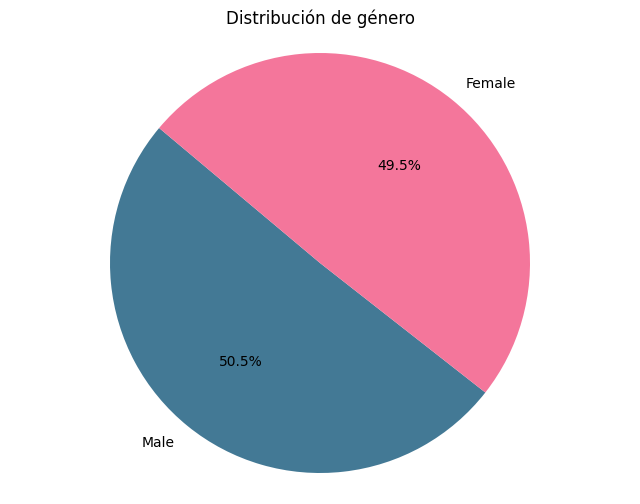

Gender
Male      189
Female    185
Name: count, dtype: int64

In [8]:
#Contamos los géneros para saber de qué genero hay más personas
gender_counts = data['Gender'].value_counts()
colors = ['#437995', '#F4769B']
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Distribución de género')
plt.axis('equal')
plt.show()
data['Gender'].value_counts()

In [8]:
#Conocemos el promedio de las edades del conjunto de datos
data['Age'].mean()

42.18449197860963

In [11]:
#Agregamos una columna nueva para hacer una distinción entre adultos y adultos mayores
data.loc[data['Age'] <= 40, 'Age_group'] = 'Adult'
data.loc[data['Age'] >= 41, 'Age_group'] = 'Older Adult'
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Adult
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Adult
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Adult
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Adult


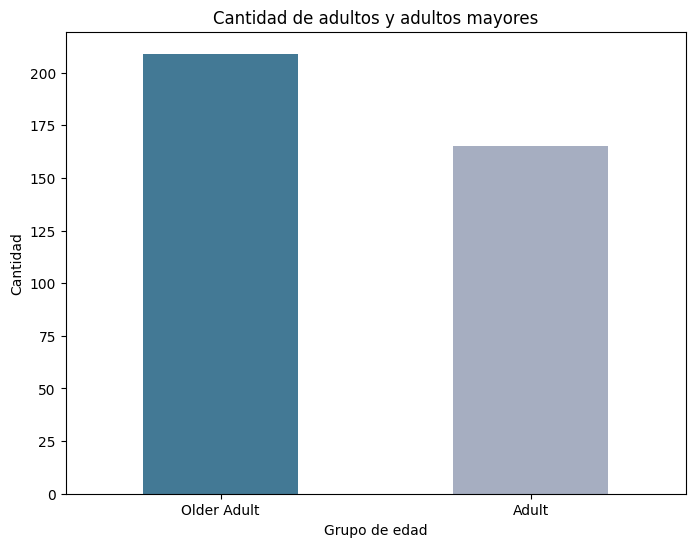

Age_group
Older Adult    209
Adult          165
Name: count, dtype: int64

In [13]:
#Vemos la cantidad de adultos y adultos mayores
age_group_counts = data['Age_group'].value_counts()

# Gráfico de barras
colors = ['#437995', '#A6AEC1']
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color=colors)

# 
plt.title('Cantidad de adultos y adultos mayores')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')

#
plt.xticks(rotation=0) 
plt.show()

data['Age_group'].value_counts()

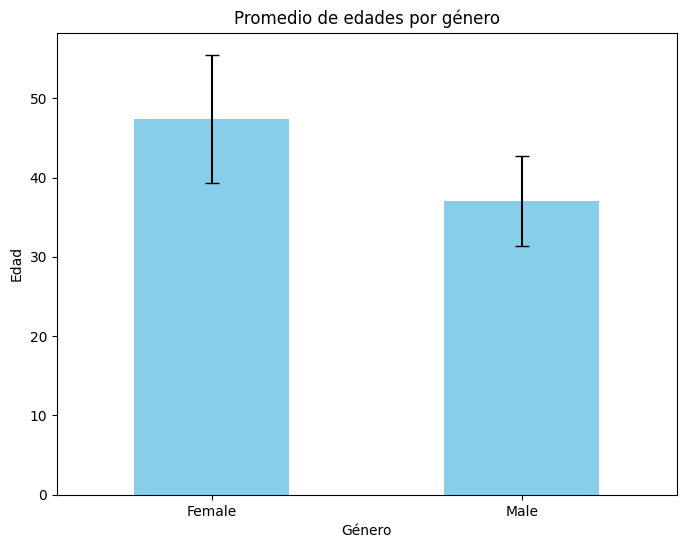

,Mean_Age,Std_Age
Gender,,
Female,47.405405,8.093407
Male,37.074074,5.662006


In [21]:
#Conocemos el promedio de edades de cada uno de los generos
result = data.groupby('Gender')['Age'].agg(['mean', 'std'])
result = result.rename(columns={'mean': 'Mean_Age', 'std': 'Std_Age'})

# Creamos el gráfico de barras con barras de error
plt.figure(figsize=(8, 6))
result['Mean_Age'].plot(kind='bar', yerr=result['Std_Age'], capsize=5, color='skyblue')

#
plt.title('Promedio de edades por género')
plt.xlabel('Género')
plt.ylabel('Edad')

# 
plt.xticks(rotation=0)  
plt.show()

result.head()

# **Análisis de las profesiones**

In [12]:
data.groupby('Occupation')['Gender'].value_counts()

Occupation            Gender
Accountant            Female    36
                      Male       1
Doctor                Male      69
                      Female     2
Engineer              Female    32
                      Male      31
Lawyer                Male      45
                      Female     2
Manager               Female     1
Nurse                 Female    73
Sales Representative  Male       2
Salesperson           Male      32
Scientist             Female     4
Software Engineer     Male       4
Teacher               Female    35
                      Male       5
Name: count, dtype: int64

In [23]:
#Me traigo los valores que indican la menor y la mayor cantidad de horas de sueño
print(data['Sleep Duration'].min(), data['Sleep Duration'].max())


5.8 8.5


<Figure size 1000x600 with 0 Axes>

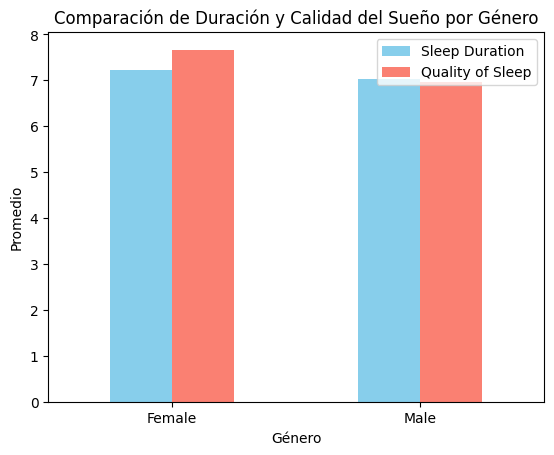

,Sleep Duration,Quality of Sleep
Gender,,
Female,7.229730,7.664865
Male,7.036508,6.968254


In [26]:
#Me fijo quién tiene mejor calidad de sueño, si los hombres o las mujeres

plt.figure(figsize=(10, 6))
sleep_stats_gender.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Comparación de Duración y Calidad del Sueño por Género')
plt.xlabel('Género')
plt.ylabel('Promedio')
plt.legend(loc='upper right')

# Mostramos el gráfico
plt.xticks(rotation=0)
plt.show()

data.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean()


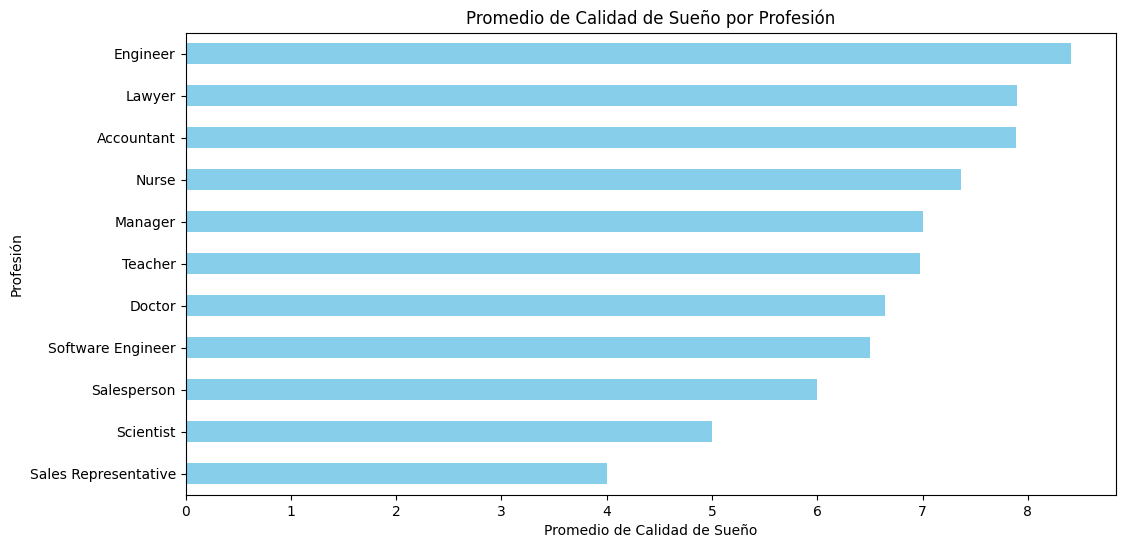

In [29]:
#Me fijo quién tiene mejor calidad de sueño según la profesión

# Calculamos el promedio de calidad de sueño por ocupación
occ_qua = data.groupby('Occupation')['Quality of Sleep'].mean().sort_values()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
occ_qua.plot(kind='barh', color='skyblue')

# Añadimos título y etiquetas de los ejes
plt.title('Promedio de Calidad de Sueño por Profesión')
plt.xlabel('Promedio de Calidad de Sueño')
plt.ylabel('Profesión')

# Mostramos el gráfico
plt.show()



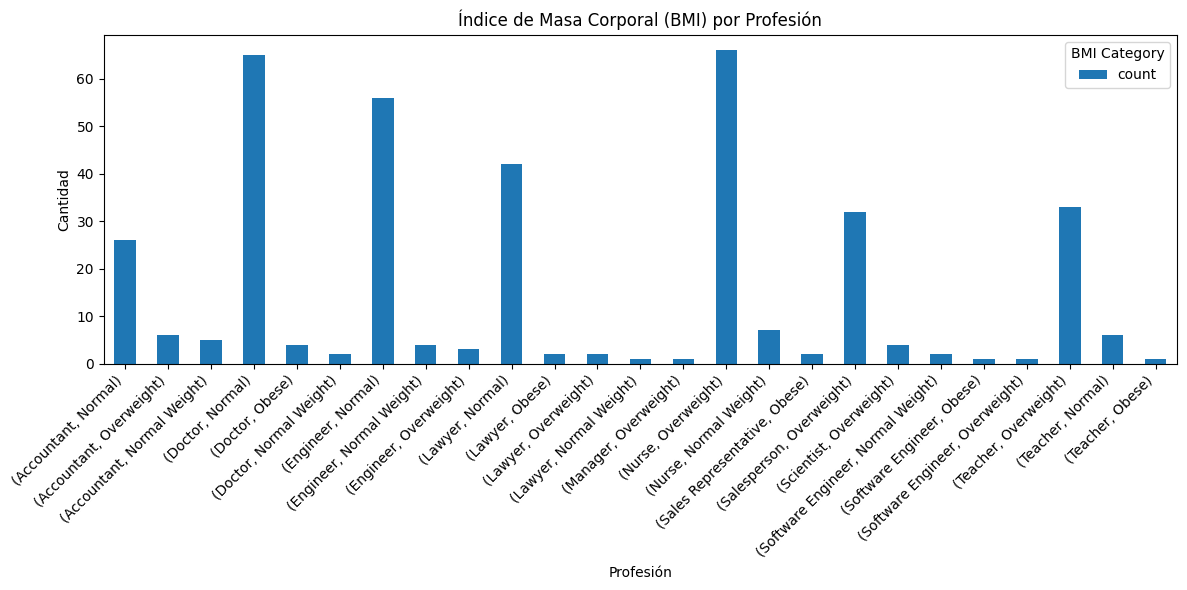

Occupation            BMI Category 
Lawyer                Normal Weight     1
Software Engineer     Overweight        1
                      Obese             1
Manager               Overweight        1
Teacher               Obese             1
Doctor                Normal Weight     2
Lawyer                Obese             2
                      Overweight        2
Software Engineer     Normal Weight     2
Sales Representative  Obese             2
Engineer              Overweight        3
                      Normal Weight     4
Doctor                Obese             4
Scientist             Overweight        4
Accountant            Normal Weight     5
                      Overweight        6
Teacher               Normal            6
Nurse                 Normal Weight     7
Accountant            Normal           26
Salesperson           Overweight       32
Teacher               Overweight       33
Lawyer                Normal           42
Engineer              Normal           5

In [30]:
#Conocemos el índice de masa corporal según la profesión 
plt.figure(figsize=(12, 6))
occ_bmi.plot(kind='bar')

# Añadimos título y etiquetas de los ejes
plt.title('Índice de Masa Corporal (BMI) por Profesión')
plt.xlabel('Profesión')
plt.ylabel('Cantidad')
plt.legend(title='BMI Category')

# Mostramos el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

occ_bmi = data.groupby(['Occupation'])['BMI Category'].value_counts()
occ_bmi.sort_values()


In [33]:
#Cuáles son las profesiones que peor calidad de sueños tienen en relación a su actividad

occ_steps = data.groupby('Occupation')[['Daily Steps', 'Physical Activity Level', 'Sleep Duration', 'Quality of Sleep']].mean()
occ_steps.sort_values(by= 'Quality of Sleep')

,Daily Steps,Physical Activity Level,Sleep Duration,Quality of Sleep
Occupation,,,,
Sales Representative,3000.000000,30.000000,5.900000,4.000000
Scientist,5350.000000,41.000000,6.000000,5.000000
Salesperson,6000.000000,45.000000,6.403125,6.000000
Software Engineer,5800.000000,48.000000,6.750000,6.500000
Doctor,6808.450704,55.352113,6.970423,6.647887
Teacher,5957.500000,45.625000,6.690000,6.975000
Manager,5500.000000,55.000000,6.900000,7.000000
Nurse,8057.534247,78.589041,7.063014,7.369863
Accountant,6881.081081,58.108108,7.113514,7.891892
